<a href="https://colab.research.google.com/github/KalebAvila/ProyectoConjunto_KAAvila_MAMurguia/blob/main/Tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" />
    
    
### <font color='navy'> Modelos no lineales para pronósticos.

**Nombres:** Kaleb Azael Avila Padilla, Manuel Alejandro Murguia Orantes

**Fecha:** 5 de Marzo de 2024.

**Expediente** : 724405, 739360
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/KalebAvila/ProyectoConjunto_KAAvila_MAMurguia

# Tarea 4: Clase 11

# <font color='red'> Tarea: </font>

Terminar los demás numerales faltantes de este ejercicio.

Código de solución estudiante 1

2. Construir una red neuronal MLP multivariada. Para esto, tomar todas las variables incluidas en nuestro dataset.

In [1]:
# Código de solución estudiante 1
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

# Cargar los datos de entrenamiento y prueba
(train_data, train_labels), (test_data, test_labels) = keras.datasets.boston_housing.load_data()
train_data.shape, test_data.shape
train_data = np.delete(train_data, -2, axis=1)
test_data = np.delete(test_data, -2, axis=1)

In [2]:
# Analizar la data completa
columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'LSTAT',
    'MEDV',
]

X = np.vstack([train_data, test_data])
y = np.hstack([train_labels, test_labels]).reshape(-1, 1)
data = pd.DataFrame(np.concatenate((X, y), axis=1), columns=columns)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,5.29,21.9
502,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,6.78,24.1
503,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,1.92,50.0
504,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,9.71,26.7


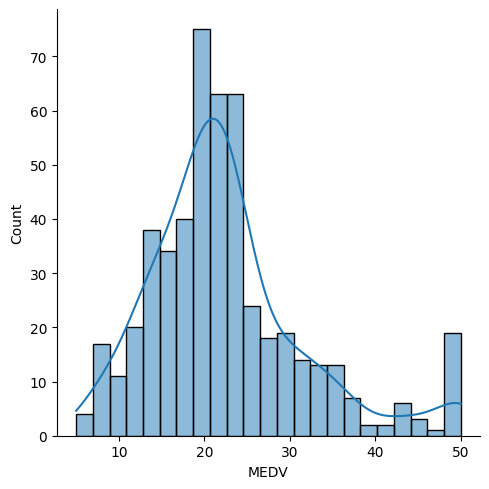

In [3]:
# Graficar la distribución de la salida (precios de viviendas) sn.distplot -> kde
sn.displot(data, x='MEDV', kde=True)

<Axes: >

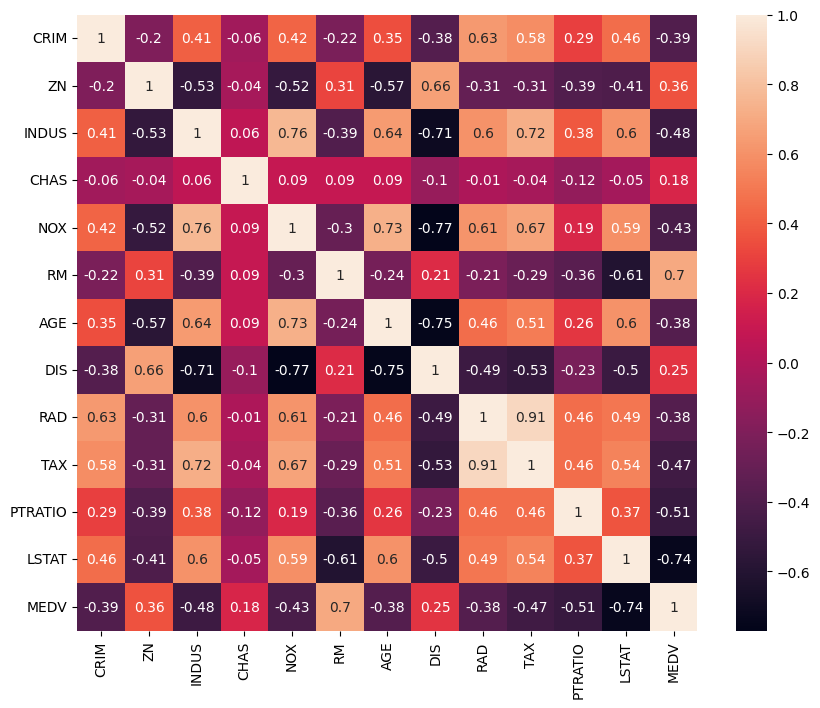

In [4]:
# Análisis de correlación (selección de features) heatmap -> annot
corr = data.corr().round(2)

fig, ax = plt.subplots(1,1, figsize=(10, 8))
sn.heatmap(corr, annot=True, ax=ax)

<Axes: xlabel='CRIM', ylabel='MEDV'>

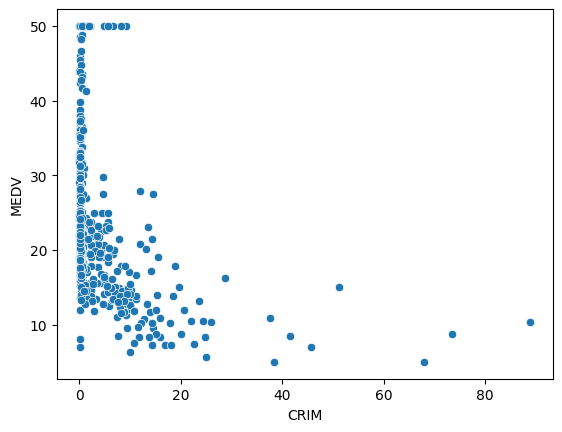

In [5]:
output_col = ['MEDV']
features_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
sn.scatterplot(data, x=features_cols[0], y=output_col[0])

<Axes: >

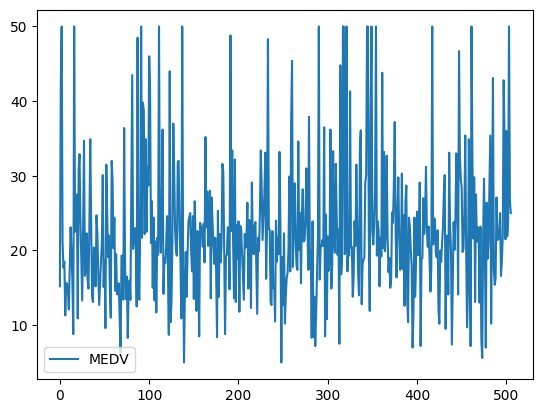

In [6]:
# Graficar la salida en el tiempo
data[output_col].plot()

<Axes: >

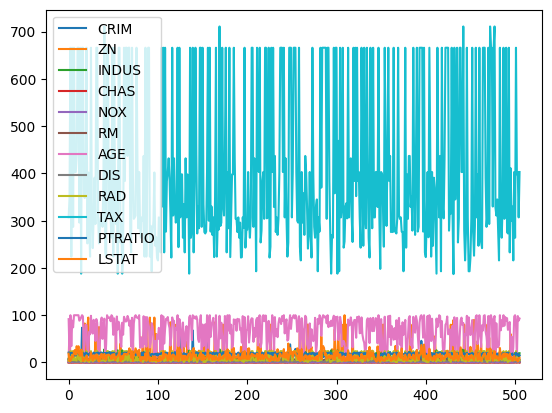

In [7]:
# Gráfica de las características en el tiempo
data[features_cols].plot()

In [8]:
# Remover outliers
def remove_outliers(df:pd.DataFrame, column:str):
    df = df.copy()
    q1, q3 = np.percentile(df[column], [25, 75])
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr

    df = df.query(f'{lb}<= {column} <= {ub}')
#     df = df[(df[column] <= ub) & (df[column] >= lb)]
    return df

In [9]:
# Remover outliers en base a los datos de la salida
y_out = remove_outliers(data[features_cols + output_col], output_col[0])
print(y_out.shape)

# Remover outliers resultantes del paso anterior para datos de features
X_out = remove_outliers(y_out, features_cols[0])
print(X_out.shape)

# Seleccionar los datos resultantes
y_out = X_out[output_col].values
X_out = X_out[features_cols].values

(466, 13)
(404, 13)


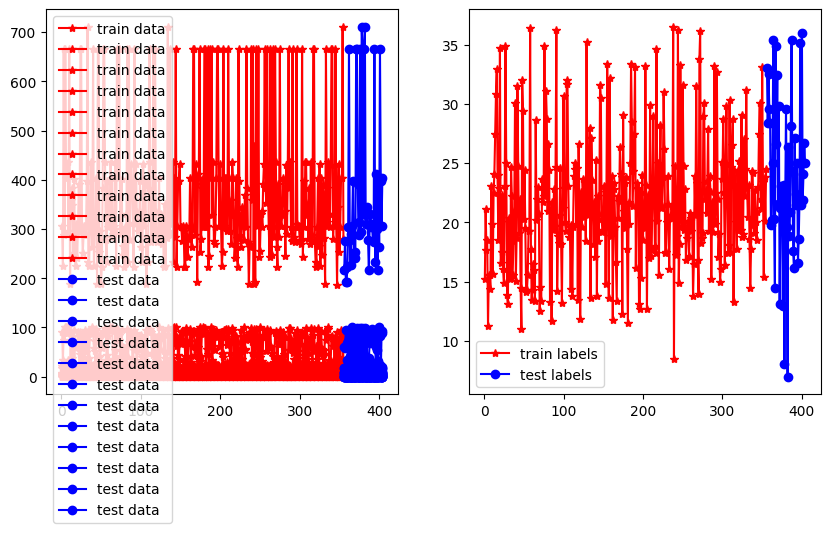

In [10]:
# Visualizo datos de entrenamiento y de prueba
TEST_SIZE = int(0.3 * data.shape[0])
TRAIN_SIZE = data.shape[0] - TEST_SIZE

t = np.arange(1, X_out.shape[0] + 1)
train_data, test_data = X_out[:TRAIN_SIZE], X_out[TRAIN_SIZE:]
train_labels, test_labels = y_out[:TRAIN_SIZE], y_out[TRAIN_SIZE:]

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(t[:TRAIN_SIZE], train_data, 'r*-', label='train data')
ax[0].plot(t[TRAIN_SIZE:], test_data, 'bo-', label='test data')
ax[0].legend()

ax[1].plot(t[:TRAIN_SIZE], train_labels, 'r*-', label='train labels')
ax[1].plot(t[TRAIN_SIZE:], test_labels, 'bo-', label='test labels')
plt.legend()

In [11]:
# Normalizar los datos de entrenamiento y prueba
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [12]:
# Poner una semilla para replicar resultados
tf.random.set_seed(1234)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

C:\Users\murgu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
test_data.shape

(49, 12)

In [14]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data, train_labels,
    validation_split=0.2,
    shuffle=False,
    epochs=50,
    batch_size=32,
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.5832 - mae: 2.6012 
Error cuadrático medio en el conjunto de prueba: 22.43307876586914
Error absoluto medio en el conjunto de prueba: 2.7306549549102783


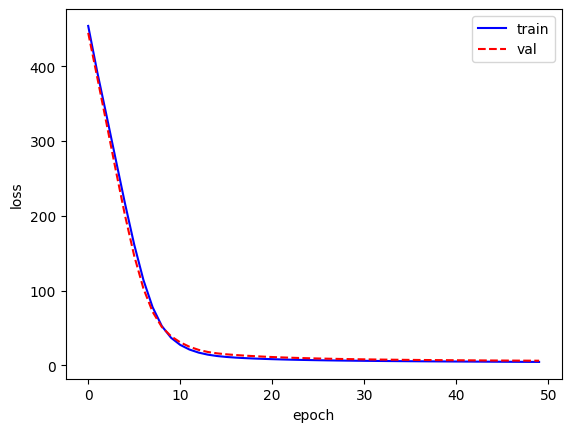

In [15]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

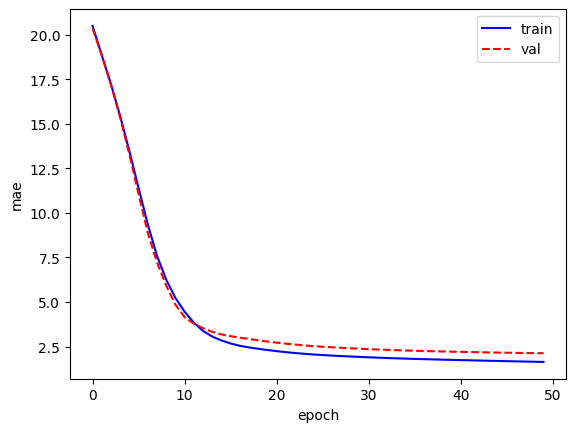

In [16]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


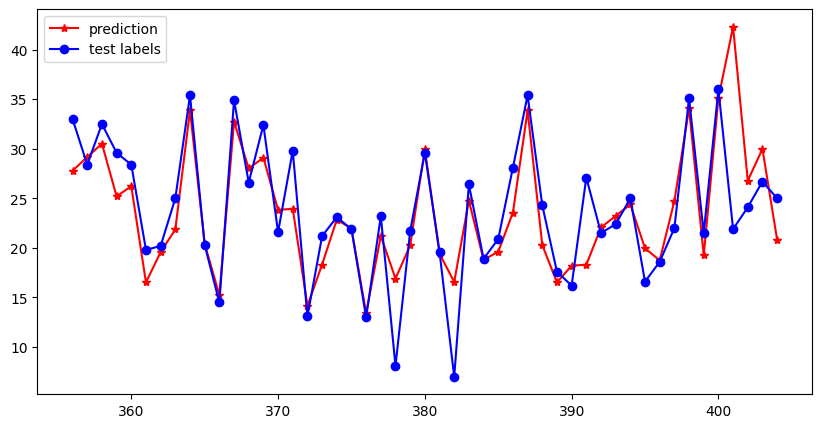

In [17]:
predicted = model.predict(test_data)
plt.figure(figsize=(10,5))
plt.plot(t[TRAIN_SIZE:], predicted, 'r*-', label='prediction')
plt.plot(t[TRAIN_SIZE:], test_labels, 'bo-', label='test labels')

plt.legend()

3. Construir una red neuronal MLP multivariada, pero en este caso sólo considerar las variables adecuadas y descartar aquellas que no aportan mucha información o que son redundantes para cuantificar el efecto de estas variables redundantes.

<Axes: >

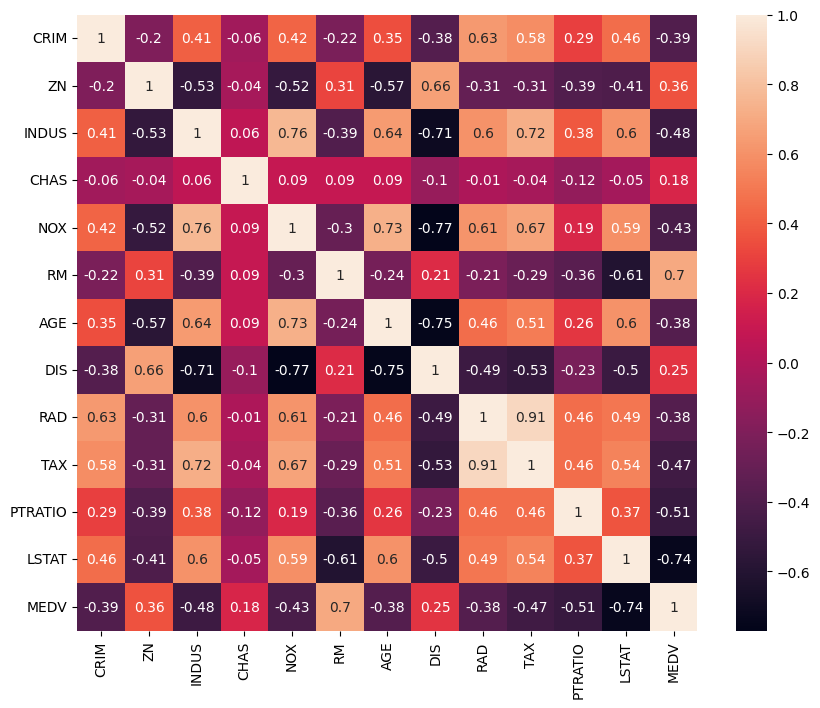

In [18]:
# Análisis de correlación (selección de features) heatmap -> annot
corr = data.corr().round(2)

fig, ax = plt.subplots(1,1, figsize=(10, 8))
sn.heatmap(corr, annot=True, ax=ax)

Vamos a ver con la correlación de pearson cuales variables pueden ser las mas importantes, como en clase se ve que RM es una de las más importantes pero debemos usar más, por lo que tomare tambien ZN y DIS que son Zone y Distance.

<Axes: xlabel='ZN', ylabel='MEDV'>

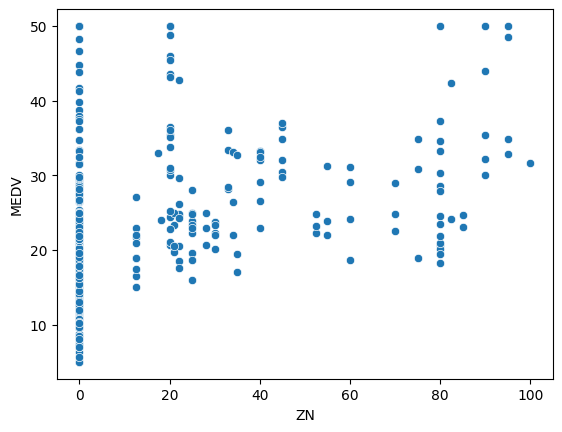

In [19]:
output_col = ['MEDV']
features_cols = ['ZN', 'DIS', 'RM']
sn.scatterplot(data, x=features_cols[0], y=output_col[0])

<Axes: >

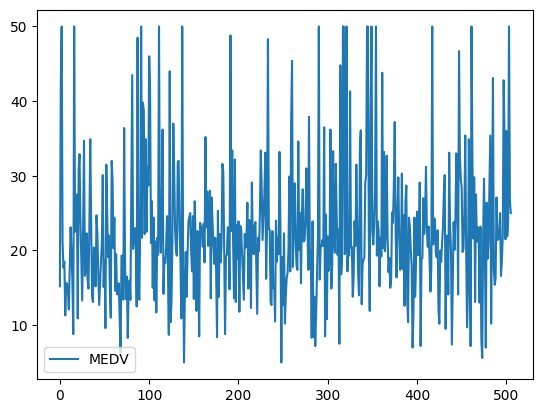

In [20]:
# Graficar la salida en el tiempo
data[output_col].plot()

<Axes: >

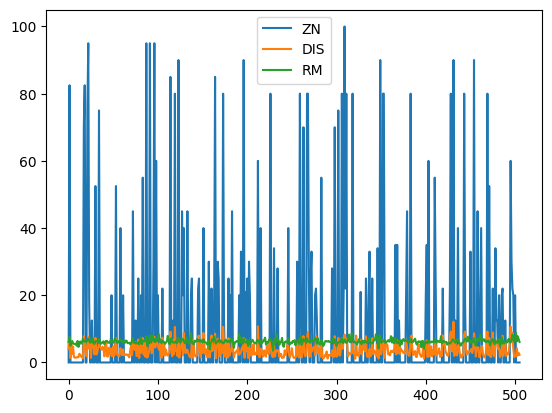

In [21]:
# Gráfica de las características en el tiempo
data[features_cols].plot()

In [22]:
data['log_rm'] = np.log(data['RM'])
data['log_medv'] = np.log(data['MEDV'])
data['log_zn'] = np.log(data['ZN'])
data['log_dis'] = np.log(data['DIS'])

C:\Users\murgu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
# Remover outliers en base a los datos de la salida
y_out = remove_outliers(data[features_cols + output_col], output_col[0])
print(y_out.shape)

# Remover outliers resultantes del paso anterior para datos de features
X_out = remove_outliers(y_out, features_cols[0])
print(X_out.shape)

# Seleccionar los datos resultantes
y_out = X_out[output_col].values
X_out = X_out[features_cols].values

(466, 4)
(406, 4)


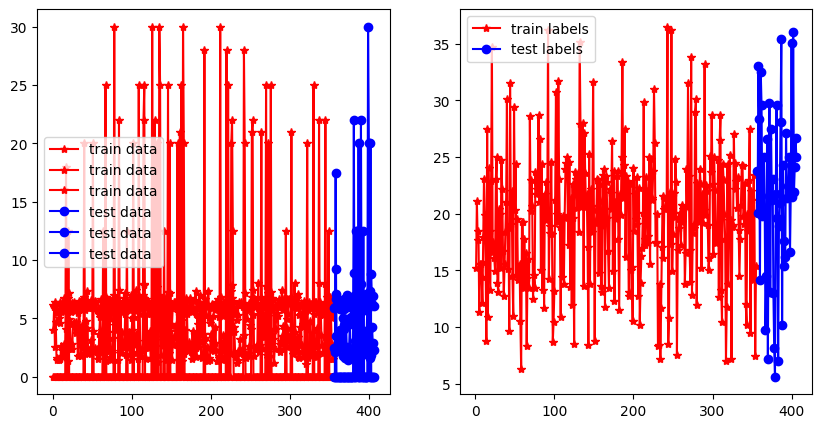

In [24]:
# Visualizo datos de entrenamiento y de prueba
TEST_SIZE = int(0.3 * data.shape[0])
TRAIN_SIZE = data.shape[0] - TEST_SIZE

t = np.arange(1, X_out.shape[0] + 1)
train_data2, test_data2 = X_out[:TRAIN_SIZE], X_out[TRAIN_SIZE:]
train_labels2, test_labels2 = y_out[:TRAIN_SIZE], y_out[TRAIN_SIZE:]

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(t[:TRAIN_SIZE], train_data2, 'r*-', label='train data')
ax[0].plot(t[TRAIN_SIZE:], test_data2, 'bo-', label='test data')
ax[0].legend()

ax[1].plot(t[:TRAIN_SIZE], train_labels2, 'r*-', label='train labels')
ax[1].plot(t[TRAIN_SIZE:], test_labels2, 'bo-', label='test labels')
plt.legend()

In [25]:
# Normalizar los datos de entrenamiento y prueba
mean = train_data2.mean(axis=0)
std = train_data2.std(axis=0)
train_data2 = (train_data2 - mean) / std
test_data2 = (test_data2 - mean) / std

In [26]:
# Poner una semilla para replicar resultados
tf.random.set_seed(4321)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data2.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

C:\Users\murgu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,481 (17.50 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
print(test_data.shape)
print(train_data.shape)

(49, 12)
(355, 12)


In [28]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data2, train_labels2,
    validation_split=0.2,
    shuffle=False,
    epochs=50,
    batch_size=32,
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data2, test_labels2)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39.0263 - mae: 5.0313 
Error cuadrático medio en el conjunto de prueba: 41.27466583251953
Error absoluto medio en el conjunto de prueba: 5.114288330078125


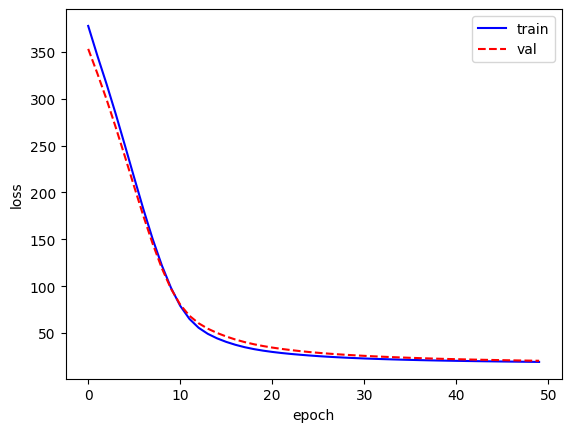

In [29]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

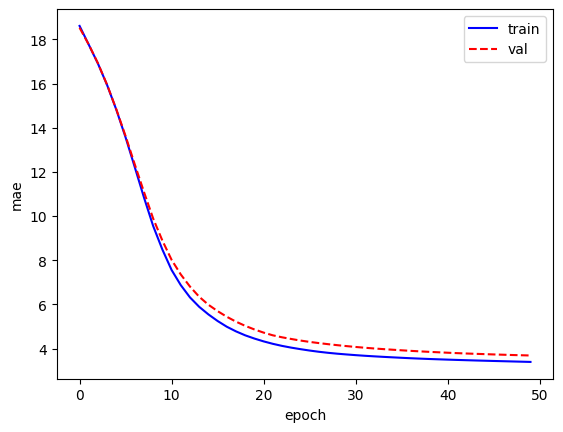

In [30]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


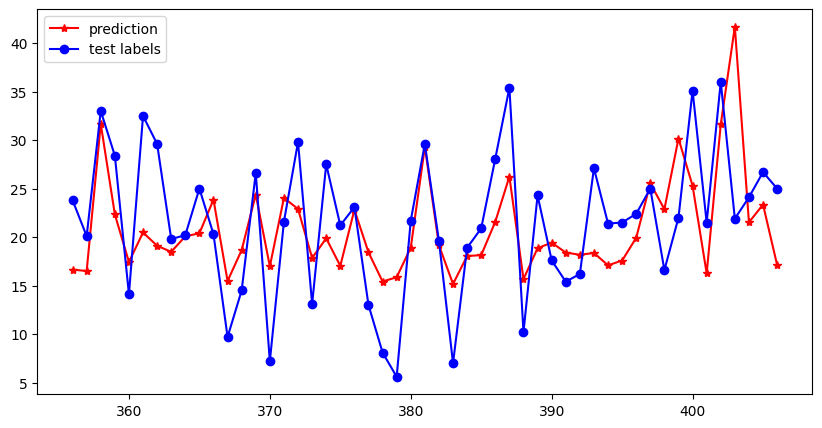

In [31]:
predicted = model.predict(test_data2)
plt.figure(figsize=(10,5))
plt.plot(t[TRAIN_SIZE:], predicted, 'r*-', label='prediction')
plt.plot(t[TRAIN_SIZE:], test_labels2, 'bo-', label='test labels')

plt.legend()

Despues de hacer los dos medelos faltantes agarrando todas las variables y las que yo creí mejores pude llegar a la conclusión de que el modelo fue mejor con todas las variables, esto puede ser que al ser precios de viviendas el tener más información en general puede dar un mejor modelo, aunque muchas veces uno nunca sabe como se puede mover el mercado inmobiliaro.

Código de solución estudiante 2

2. 
Construir una red neuronal MLP multivariada. Para esto, tomar todas las variables incluidas en nuestro datasets.

In [32]:
# Código de solución estudiante 2

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import warnings

warnings.filterwarnings('ignore')

# Cargar los datos de entrenamiento y prueba
(train_data, train_labels), (test_data, test_labels) = keras.datasets.boston_housing.load_data()

In [33]:
# Obviar la columna -2 por que considera una variable de poco interés
np.delete(train_data, -2, axis=1)[0:3,-4:]

array([[  4.  , 307.  ,  21.  ,  18.72],
       [  2.  , 348.  ,  14.7 ,   3.11],
       [ 24.  , 666.  ,  20.2 ,   3.26]])

In [34]:
train_data = np.delete(train_data, -2, axis=1)
test_data = np.delete(test_data, -2, axis=1)

In [35]:
# Analizar la data completa
columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'LSTAT',
    'MEDV',
]

X = np.vstack([train_data, test_data])
y = np.hstack([train_labels, test_labels]).reshape(-1, 1)
data = pd.DataFrame(np.concatenate((X, y), axis=1), columns=columns)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,5.29,21.9
502,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,6.78,24.1
503,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,1.92,50.0
504,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,9.71,26.7


In [36]:
features_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
output_col = ['MEDV']

In [37]:
# Remover outliers
def remove_outliers(df:pd.DataFrame, column:str):
    df = df.copy()
    q1, q3 = np.percentile(df[column], [25, 75])
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    
    df = df.query(f'{lb}<= {column} <= {ub}')
#     df = df[(df[column] <= ub) & (df[column] >= lb)]
    return df

In [38]:
# Remover outliers en base a los datos de la salida
y_out = remove_outliers(data[features_cols + output_col], output_col[0])
print(y_out.shape)

# Remover outliers resultantes del paso anterior para datos de features
X_out = remove_outliers(y_out, features_cols[0])
print(X_out.shape)

# Seleccionar los datos resultantes
y_out = X_out[output_col].values
X_out = X_out[features_cols].values

(466, 13)
(404, 13)


In [39]:
# Visualizo datos de entrenamiento y de prueba
TEST_SIZE = 0.2
TRAIN_SIZE = int((1 - TEST_SIZE) * X_out.shape[0])

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = X_out[:TRAIN_SIZE], X_out[TRAIN_SIZE:]
train_labels, test_labels = y_out[:TRAIN_SIZE], y_out[TRAIN_SIZE:]

In [40]:
# Normalizar los datos de entrenamiento y prueba
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [41]:
# Poner una semilla para replicar resultados
tf.random.set_seed(5465)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data, train_labels,
    validation_split=0.2,
    shuffle=False,
    epochs=200,
    batch_size=32,
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0076 - mae: 2.2163 
Error cuadrático medio en el conjunto de prueba: 10.024173736572266
Error absoluto medio en el conjunto de prueba: 2.2381749153137207


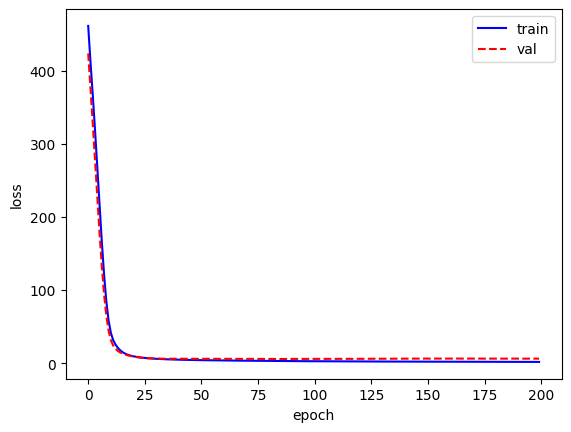

In [43]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

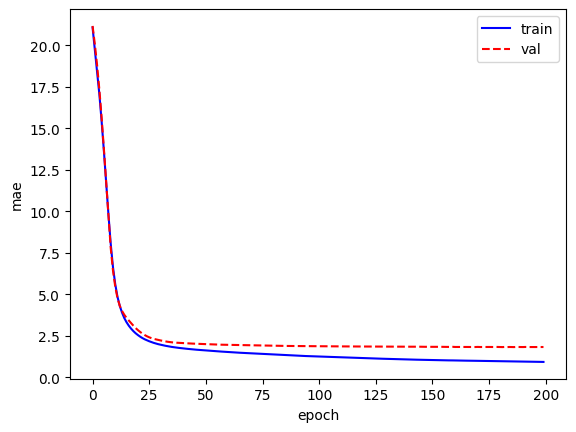

In [44]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

In [45]:
predicted = model.predict(test_data)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/stepWARNING:tensorflow:6 out of the last 7 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000021D12293B00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


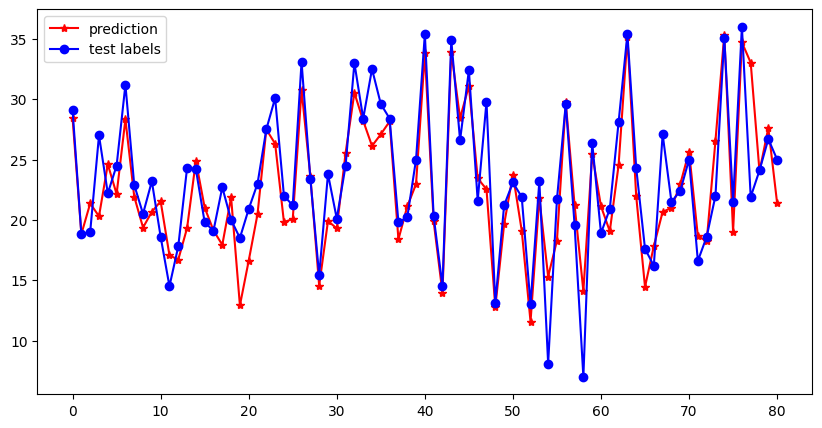

In [46]:
plt.figure(figsize=(10,5))
plt.plot(predicted, 'r*-', label='prediction')
plt.plot(test_labels, 'bo-', label='test labels')

plt.legend()

3. Construir una red neuronal MLP multivariada, pero en este caso sólo considerar las variables adecuadas y descartar aquellas que no aportan mucha información o que son redundantes para cuantificar el efecto de estas variables redundantes.

In [47]:
# Cargar los datos de entrenamiento y prueba
(train_data, train_labels), (test_data, test_labels) = keras.datasets.boston_housing.load_data()

# Obviar la columna -2 por que considera una variable de poco interés
np.delete(train_data, -2, axis=1)[0:3,-4:]

train_data = np.delete(train_data, -2, axis=1)
test_data = np.delete(test_data, -2, axis=1)

# Analizar la data completa
columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'LSTAT',
    'MEDV',
]

X = np.vstack([train_data, test_data])
y = np.hstack([train_labels, test_labels]).reshape(-1, 1)
data = pd.DataFrame(np.concatenate((X, y), axis=1), columns=columns)

In [48]:
from sklearn.feature_selection import SelectKBest, f_regression

# Definir las características (X) y la variable objetivo (y)
X = data.drop(columns=['MEDV'])  # Todas las columnas excepto 'MEDV'
y = data['MEDV']

# Seleccionar las mejores características
selector = SelectKBest(score_func=f_regression, k=6)  # Seleccionar las 5 mejores características
selector.fit(X, y)

# Obtener las características seleccionadas
selected_features = X.columns[selector.get_support()]

# Imprimir las mejores características seleccionadas
print("Las mejores características seleccionadas son:", selected_features)

Las mejores características seleccionadas son: Index(['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')


In [49]:
features_cols = ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
output_col = ['MEDV']

In [50]:
# Remover outliers en base a los datos de la salida
y_out = remove_outliers(data[features_cols + output_col], output_col[0])
print(y_out.shape)

# Remover outliers resultantes del paso anterior para datos de features
X_out = remove_outliers(y_out, features_cols[0])
print(X_out.shape)

# Seleccionar los datos resultantes
y_out = X_out[output_col].values
X_out = X_out[features_cols].values

(466, 7)
(466, 7)


In [51]:
# Visualizo datos de entrenamiento y de prueba
TEST_SIZE = 0.2
TRAIN_SIZE = int((1 - TEST_SIZE) * X_out.shape[0])

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = X_out[:TRAIN_SIZE], X_out[TRAIN_SIZE:]
train_labels, test_labels = y_out[:TRAIN_SIZE], y_out[TRAIN_SIZE:]

In [52]:
# Normalizar los datos de entrenamiento y prueba
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [53]:
# Poner una semilla para replicar resultados
tf.random.set_seed(5465)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data, train_labels,
    validation_split=0.2,
    shuffle=False,
    epochs=200,
    batch_size=32,
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.4498 - mae: 2.4242
Error cuadrático medio en el conjunto de prueba: 13.342182159423828
Error absoluto medio en el conjunto de prueba: 2.6246232986450195


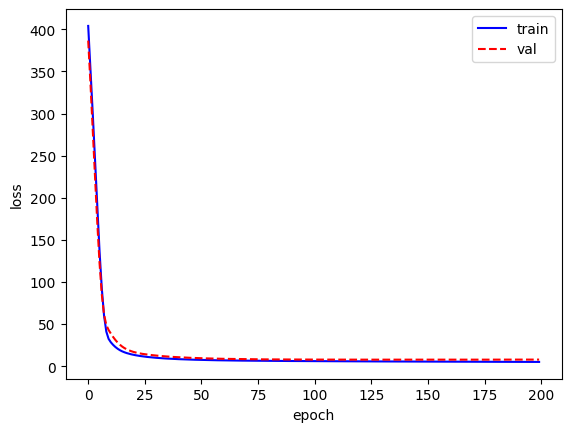

In [55]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

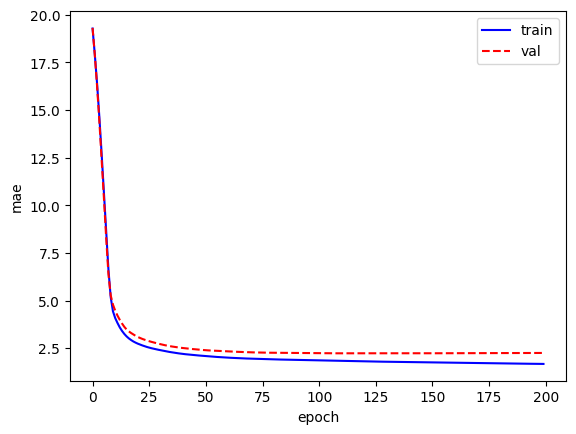

In [56]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

In [57]:
predicted = model.predict(test_data)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


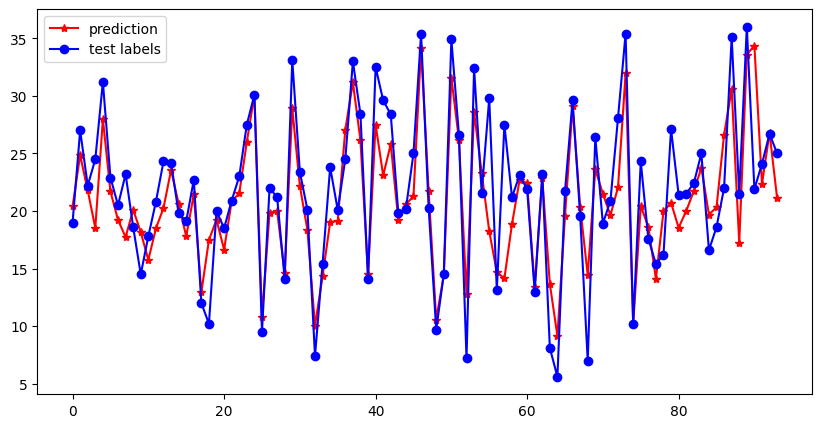

In [58]:
plt.figure(figsize=(10,5))
plt.plot(predicted, 'r*-', label='prediction')
plt.plot(test_labels, 'bo-', label='test labels')

plt.legend()

In [59]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [60]:
# Poner una semilla para replicar resultados
tf.random.set_seed(5465)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    Dropout(0.3),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Configurar EarlyStopping como callback
earlyStopping = EarlyStopping(monitor='val_loss', patience=5)  # Si el val_loss no mejora después de 5  iteraciones para la entrenamiento

# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data, train_labels,
    validation_split=0.2,
    shuffle=False,
    epochs=200,
    batch_size=32,
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.9562 - mae: 2.7853
Error cuadrático medio en el conjunto de prueba: 14.433262825012207
Error absoluto medio en el conjunto de prueba: 2.9425015449523926


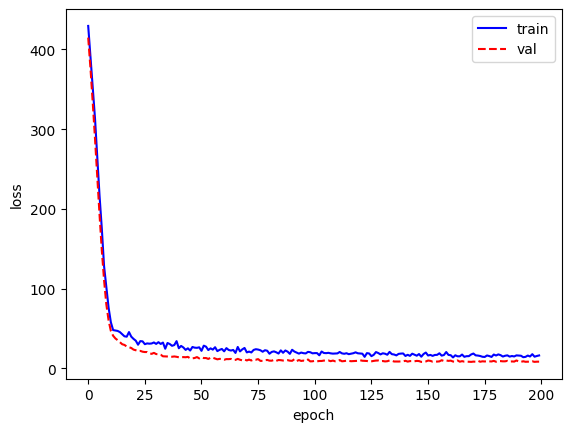

In [62]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

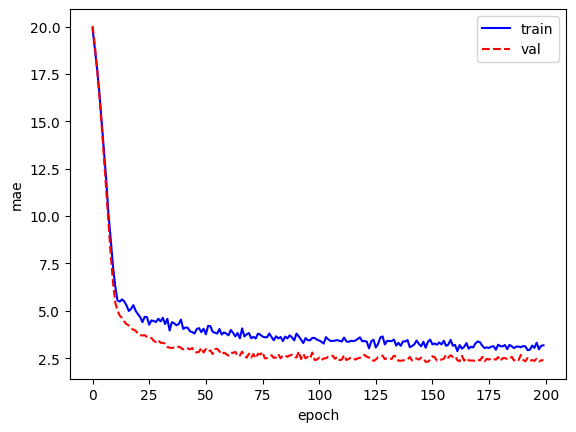

In [63]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

In [64]:
predicted = model.predict(test_data)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


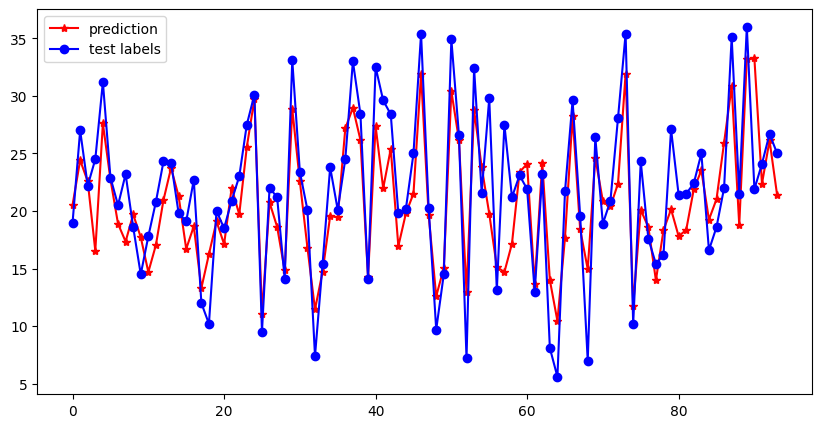

In [65]:
plt.figure(figsize=(10,5))
plt.plot(predicted, 'r*-', label='prediction')
plt.plot(test_labels, 'bo-', label='test labels')

plt.legend()

In [66]:
print("Quedó God")

Quedó God


### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........